copy from https://blog.naver.com/ckdgus1433/221443838135

# 모듈 임포팅

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# 데이터 로딩

In [2]:
# MNIST 로딩 (라벨은 필요없기 때문에 버림)
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# Normalization

In [3]:
# 데이터 정규화
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


# Flattening

In [4]:
x_train = np.reshape(x_train, (len(x_train), 784))
x_test = np.reshape(x_test, (len(x_test), 784))


# 영상 보기

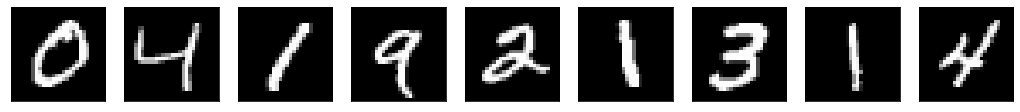

In [5]:
# Noise가 추가된 데이터 확인
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 모델 정의와 학습 실행

In [6]:
# 모형 구성
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')


# 모형 학습
model.fit(x_train, x_train, epochs=100, batch_size=256)


Epoch 1/100
235/235 [==============================] - 3s 3ms/step - loss: 0.2473
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1548
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1338
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1234
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1168
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1129
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1098
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1073
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1055
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1037
Epoch 11/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1022
Epoch 12/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1008
Epoch 13/100


# 결과 확인

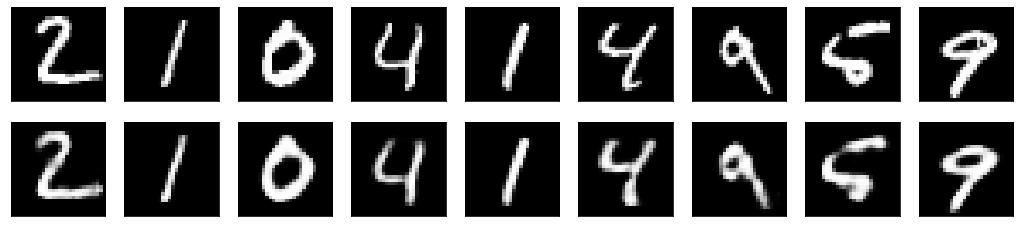

In [7]:
reconstruted = model.predict(x_test)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1,n):
    # 원본 표시
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # 출력된 것
    ax = plt.subplot(3, n, i + n)
    plt.imshow(reconstruted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()